In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Conv2D, Flatten, LSTM, GRU, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import regularizers, optimizers, initializers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1.- Escribe un trozo de código que sirva para definir un modelo en Keras para solucionar cada uno de los siguientes problemas (solo tenéis que definir el modelo pero tiene que poder compilarse la celda, i.e. que no de error). Muestra el resumen del modelo por pantalla.

- Tenemos un problema de clasificación de objetos donde tenemos 5000 imágenes de 28x28 en color. Para cada objeto tenemos una etiqueta numérica con valores de [0-19] (20 clases de objetos distintas). Propon un modelo teniendo en cuenta lo que has aprendido en clase.

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(64, 
                 kernel_size=3,
                 activation='relu',
                 padding= 'same',
                 input_shape=(28,28,3)))

model_1.add(MaxPooling2D(2))

model_1.add(Conv2D(32, 
                 kernel_size=3,
                 activation='relu',
                 padding='same'))
model_1.add(MaxPooling2D(2))

model_1.add(Flatten())

model_1.add(Dense(20, 
                  activation='softmax'))

model_1.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 1568)              0         
                                                                 
 dense_42 (Dense)            (None, 20)              

- Tenemos 500 datos de series temporales de un activo financiero, cada dato tiene una longitud de 7. Las salidas son las predicciones para el instante temporal siguiente. Escribe un trozo de código que sirva para definir un modelo en Keras que tenga al menos dos capas LSTM, una capa GRU y una densa.

In [ ]:
model_2 = Sequential()

model_2.add(LSTM(64,
                  activation='relu',
                  return_sequences = True,
                  input_shape = (7,1)))

model_2.add(LSTM(32,
                 activation = 'relu',
                 return_sequences = True))

model_2.add(GRU(32, 
                 activation = 'relu'))

model_2.add(Dense(1))

model_2.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 7, 64)             16896     
                                                                 
 lstm_20 (LSTM)              (None, 7, 32)             12416     
                                                                 
 gru_9 (GRU)                 (None, 32)                6336      
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 35,681
Trainable params: 35,681
Non-trainable params: 0
_________________________________________________________________


- Tenemos 50000 datos de series temporales de 10 activos financieros de longitud 13, i.e. (50000, 13, 10). La salida son las 4 posibles fases del investment clock (reflation, recovery, overheat, y stagflation) para el instante temporal siguiente. Escribe un trozo de código que sirva para definir un modelo en Keras que combine al menos una capa LSTM, dos convolucionales y una densa.

In [ ]:
model_3 = Sequential()

model_3.add(Conv1D(64,
                    kernel_size = 3,
                    activation = 'relu',
                    padding = 'same',
                    input_shape =(13, 10)))

model_3.add(Conv1D(32,
                    kernel_size= 3,
                    activation = 'relu',
                    padding = 'same'))

model_3.add(LSTM(32,
                  activation = 'relu'))

model_3.add(Dense(4,
                  activation = 'softmax'))

model_3.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 13, 64)            1984      
                                                                 
 conv1d_13 (Conv1D)          (None, 13, 32)            6176      
                                                                 
 lstm_18 (LSTM)              (None, 32)                8320      
                                                                 
 flatten_20 (Flatten)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 4)                 132       
                                                                 
Total params: 16,612
Trainable params: 16,612
Non-trainable params: 0
_________________________________________________________________


2.- Entrena un modelo en Keras que tenga al menos tres capas convolucionales, use regularización y early stopping para resolver el problema de clasificación con los datos CIFAR100 que están en Keras. Comprueba que el proceso de entrenamiento ha convergido mostrando las curvas de entrenamiento para entrenamiento y para validación.


In [ ]:
(x_train, t_train), (x_test, t_test) = cifar100.load_data()

In [ ]:
x_train.shape
x_test.shape
t_test.shape

(10000, 1)

In [ ]:
n = 255.0

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/ n
x_test = x_test/ n

#one hot encoding en la 't'
t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

In [ ]:
model_ej2 = Sequential ()

model_ej2.add(Conv2D(64, kernel_size = 3,
                       activation = 'relu',
                       input_shape = (32, 32, 3),
                       kernel_regularizer = regularizers.l1(0.0001),
                       kernel_initializer = initializers.GlorotNormal()))
model_ej2.add(BatchNormalization())
model_ej2.add(Dropout(0.3))
model_ej2.add(MaxPooling2D())

model_ej2.add(Conv2D(128,
                   kernel_size = 3,
                   activation = 'relu', 
                   kernel_regularizer = regularizers.l1(0.0001), 
                   kernel_initializer = initializers.GlorotNormal()))
model_ej2.add(BatchNormalization())
model_ej2.add(Dropout(0.3))
model_ej2.add(MaxPooling2D())


model_ej2.add(Conv2D(32, kernel_size = 3, activation = 'relu', 
                   kernel_regularizer = regularizers.l1(0.0001), 
                   kernel_initializer = initializers.GlorotNormal()))
model_ej2.add(BatchNormalization())
model_ej2.add(Dropout(0.3))
model_ej2.add(MaxPooling2D())

model_ej2.add(Flatten())

model_ej2.add(Dense(256,
                      activation = 'relu',
                      kernel_regularizer = regularizers.l1(0.0001),
                      kernel_initializer = initializers.GlorotNormal()))
model_ej2.add(BatchNormalization())
model_ej2.add(Dropout(0.3))

model_ej2.add(Dense(100,
                      activation = 'softmax'
                      ))

model_ej2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 128)      5

In [ ]:
model_ej2.compile(optimizer= optimizers.Adam(learning_rate = 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                                patience = 25,
                                min_delta = 0.01)

In [ ]:
hist_ej2 = model_ej2.fit(x_train, t_train,
              validation_split = 0.3, 
              epochs = 100,
              callbacks = [early_stopping])

#Por epoca tarda unos 9 segundos
#Sin GPU 187s

Epoch 1/100
1094/1094 [==============================] - 15s 8ms/step - loss: 5.3266 - accuracy: 0.0404 - val_loss: 4.9837 - val_accuracy: 0.0525
Epoch 2/100
1094/1094 [==============================] - 8s 7ms/step - loss: 4.7178 - accuracy: 0.0810 - val_loss: 4.7754 - val_accuracy: 0.0747
Epoch 3/100
1094/1094 [==============================] - 9s 8ms/step - loss: 4.4519 - accuracy: 0.1071 - val_loss: 4.6644 - val_accuracy: 0.0901
Epoch 4/100
1094/1094 [==============================] - 8s 7ms/step - loss: 4.2353 - accuracy: 0.1361 - val_loss: 4.4214 - val_accuracy: 0.1127
Epoch 5/100
1094/1094 [==============================] - 8s 7ms/step - loss: 4.0487 - accuracy: 0.1639 - val_loss: 4.1990 - val_accuracy: 0.1410
Epoch 6/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.9084 - accuracy: 0.1833 - val_loss: 4.0742 - val_accuracy: 0.1621
Epoch 7/100
1094/1094 [==============================] - 9s 8ms/step - loss: 3.7780 - accuracy: 0.2047 - val_loss: 3.9293 - val_a

In [ ]:
score = model_ej2.evaluate(x_test, t_test)
score

313/313 [==============================] - 1s 4ms/step - loss: 2.6951 - accuracy: 0.3861


[2.695096492767334, 0.38609999418258667]

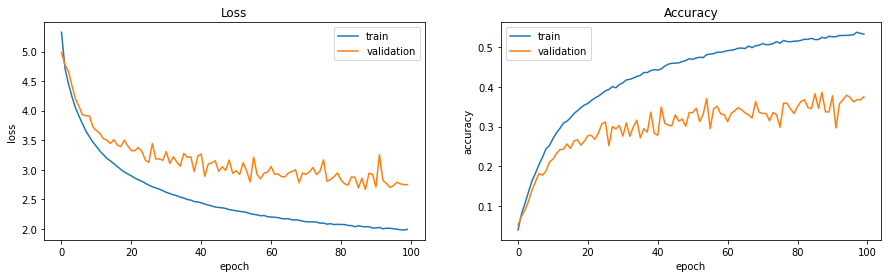

In [ ]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_ej2.history ['loss'], label = "train")
plt.plot(hist_ej2.history ['val_loss'], label = "validation")
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot (hist_ej2.history['accuracy'], label = "train")
plt.plot (hist_ej2.history['val_accuracy'], label = "validation")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

3.- Entrena un modelo en Keras con capas convolucionales para predecir el valor diario de cierre de bolsa de Amazon (puedes usar los datos que vimos en clase y que están en kaggle). Utiliza de los datos de apertura de 4 días anteriores para predecir el valor del día actual. Compáralo con un modelo con una capa lineal.

In [3]:
amz = pd.read_csv("amzn.us.txt", delimiter = ",")
amz.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0
5152,2017-11-10,1126.10,1131.75,1124.06,1125.35,2179181,0


In [4]:
#Columnas open y Close
amzn_open = amz['Open']
amzn_close = amz['Close']

In [5]:
# Organizamos datos
xx = amzn_open.values[0:4000]
tt = amzn_close.values[0:4000]
x_train = np.reshape(xx,(1000, 4, 1))
t_train = tt[3:4000:4]

xx = amzn_open.values[4000:5000]
tt = amzn_close.values[4000:5000]
x_test = np.reshape(xx,(250, 4, 1))
t_test = tt[3:1000:4]

In [13]:
model_ej3 = Sequential()

model_ej3.add (Conv1D(64, 
                       kernel_size = 3,
                       activation = 'relu', 
                       input_shape = x_train.shape [1:],
                       padding = 'same',
                       ))
model_ej3.add (Conv1D(32, 
                       kernel_size = 3,
                       activation = 'relu', 
                       input_shape = x_train.shape [1:],
                       padding = 'same',
                       ))

model_ej3.add (Flatten())
model_ej3.add (Dense(1))

model_ej3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 64)             256       
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 32)             6176      
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Compilamos
model_ej3.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = 'mse')

In [15]:
hist_ej3 = model_ej3.fit(x_train, t_train, epochs = 50, validation_split = 0.3)

Epoch 1/50
22/22 [==============================] - 1s 9ms/step - loss: 814.9099 - val_loss: 26.7304
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 33.5023 - val_loss: 55.6838
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 10.9439 - val_loss: 32.4933
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 8.0523 - val_loss: 33.0208
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 6.9392 - val_loss: 26.0483
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 6.7984 - val_loss: 27.0625
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 6.6641 - val_loss: 24.5260
Epoch 8/50
22/22 [==============================] - 0s 3ms/step - loss: 6.5569 - val_loss: 24.5128
Epoch 9/50
22/22 [==============================] - 0s 3ms/step - loss: 6.5145 - val_loss: 23.6938
Epoch 10/50
22/22 [==============================] - 0s 4ms/step - loss: 6.1071 - val_loss: 24.7928
Epoch

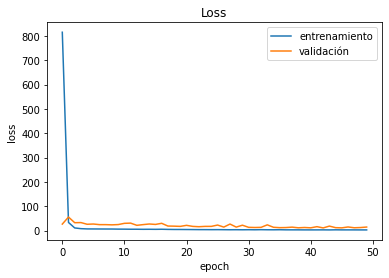

In [16]:
# Gráfico
plt.plot(hist_ej3.history['loss'], label = "entrenamiento")
plt.plot(hist_ej3.history['val_loss'], label = "validación")
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [17]:
#Predicion
y_pred = model_ej3.predict(x_test)

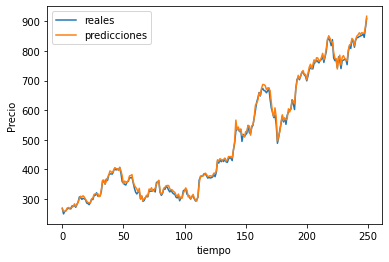

In [18]:
# Grafica
plt.figure()
plt.plot (t_test, label = 'reales')
plt.plot(y_pred, label = 'predicciones')
plt.xlabel('tiempo')
plt.ylabel('Precio')
plt.legend()

In [19]:
# Evaluacion
score = model_ej3.evaluate(x_test, t_test)
score

8/8 [==============================] - 0s 2ms/step - loss: 70.8197


70.81971740722656

Modelo capas densas

In [20]:
# modelo capas densas
model2_ej3 = Sequential()

model2_ej3.add(Dense(64, 
                       activation = 'relu', 
                       input_shape = x_train.shape [1:]))
model2_ej3.add(Flatten())
model2_ej3.add(Dense(1))

model2_ej3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4, 64)             128       
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compilo el modelo.
model2_ej3.compile(optimizer = optimizers.Adam(learning_rate = 0.005), loss = 'mse')


In [22]:
# Entreno el modelo.
hist_ej3 = model2_ej3.fit(x_train, t_train, epochs = 50, validation_split = 0.3)

Epoch 1/50
22/22 [==============================] - 1s 16ms/step - loss: 281.0344 - val_loss: 57.5492
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 23.1300 - val_loss: 178.8986
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 9.3876 - val_loss: 31.0106
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 6.5640 - val_loss: 28.5326
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 6.2045 - val_loss: 33.1245
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 6.2617 - val_loss: 23.3653
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 6.4382 - val_loss: 27.4530
Epoch 8/50
22/22 [==============================] - 0s 3ms/step - loss: 5.8626 - val_loss: 22.6392
Epoch 9/50
22/22 [==============================] - 0s 3ms/step - loss: 5.7323 - val_loss: 25.8913
Epoch 10/50
22/22 [==============================] - 0s 3ms/step - loss: 5.9335 - val_loss: 32.6091
Epoc

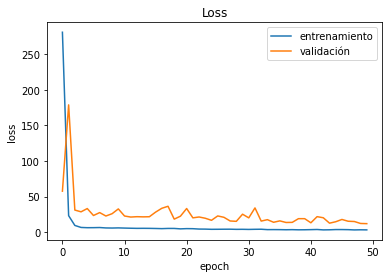

In [23]:
# Grafica curva loss
plt.plot(hist_ej3.history['loss'], label = "entrenamiento")
plt.plot(hist_ej3.history['val_loss'], label = "validación")
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [24]:
# Predicción datos test
y_pred = model2_ej3.predict(x_test)


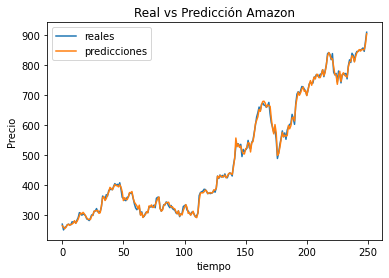

In [25]:
# Grafica
plt.figure()
plt.plot (t_test, label = 'reales')
plt.plot (y_pred, label = 'predicciones')
plt.title('Real vs Predicción Amazon')
plt.xlabel('tiempo')
plt.ylabel('Precio')
plt.legend()

In [26]:
# Evaluacion con los datos de test.
score = model2_ej3.evaluate(x_test, t_test)
score

8/8 [==============================] - 0s 2ms/step - loss: 48.2062


48.2061767578125

4.- Entrena un modelo en Keras que combine capas GRU y convolucionales para predecir los valores de cierre de Amazon utilizando como entrada únicamente los valores de apertura de los datos Amazon de los 4 días anteriores y que obtenga unos resultados en test mejores que los del apartado anterior.

In [2]:
amz = pd.read_csv("amzn.us.txt", delimiter = ",")
amz.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0
5152,2017-11-10,1126.10,1131.75,1124.06,1125.35,2179181,0


In [3]:
#Columnas open y Close
amzn_open = amz['Open']
amzn_close = amz['Close']

In [4]:
# Organizamos datos
xx = amzn_open.values[0:4000]
tt = amzn_close.values[0:4000]
x_train = np.reshape(xx,(1000, 4, 1))
t_train = tt[3:4000:4]

xx = amzn_open.values[4000:5000]
tt = amzn_close.values[4000:5000]
x_test = np.reshape(xx,(250, 4, 1))
t_test = tt[3:1000:4]

In [5]:
model_ej4 = Sequential()

model_ej4.add(Conv1D(64,
                       kernel_size = 3, 
                       activation = 'relu', 
                       input_shape = x_train.shape [1:], 
                       padding = 'same'))

model_ej4.add(GRU(32, 
                    return_sequences = False, 
                    activation = 'relu'))
model_ej4.add(Flatten())
model_ej4.add(Dense(1))

model_ej4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             256       
                                                                 
 gru (GRU)                   (None, 32)                9408      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 9,697
Trainable params: 9,697
Non-trainable params: 0
_________________________________________________________________


In [6]:
model_ej4.compile(optimizer = optimizers.Adam(learning_rate = 0.005), loss = 'mse')

In [7]:
hist_ej4 = model_ej4.fit(x_train, t_train, epochs = 50, validation_split = 0.3)

Epoch 1/50
22/22 [==============================] - 4s 36ms/step - loss: 331.1939 - val_loss: 105.0725
Epoch 2/50
22/22 [==============================] - 0s 12ms/step - loss: 6.9885 - val_loss: 28.9855
Epoch 3/50
22/22 [==============================] - 0s 14ms/step - loss: 5.0357 - val_loss: 18.9349
Epoch 4/50
22/22 [==============================] - 0s 12ms/step - loss: 4.7956 - val_loss: 20.7662
Epoch 5/50
22/22 [==============================] - 0s 17ms/step - loss: 5.4358 - val_loss: 28.7657
Epoch 6/50
22/22 [==============================] - 0s 11ms/step - loss: 4.6464 - val_loss: 45.0566
Epoch 7/50
22/22 [==============================] - 0s 11ms/step - loss: 4.4496 - val_loss: 29.7960
Epoch 8/50
22/22 [==============================] - 0s 11ms/step - loss: 4.3615 - val_loss: 18.8184
Epoch 9/50
22/22 [==============================] - 0s 13ms/step - loss: 3.9288 - val_loss: 18.1417
Epoch 10/50
22/22 [==============================] - 0s 13ms/step - loss: 4.0667 - val_loss: 25.6

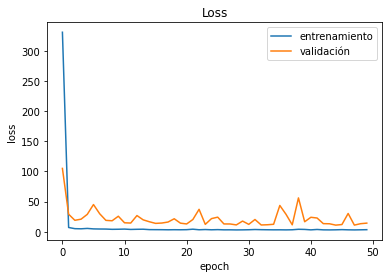

In [8]:
plt.plot(hist_ej4.history['loss'], label = "entrenamiento")
plt.plot(hist_ej4.history['val_loss'], label = "validación")
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [9]:
y_pred = model_ej4.predict(x_test)

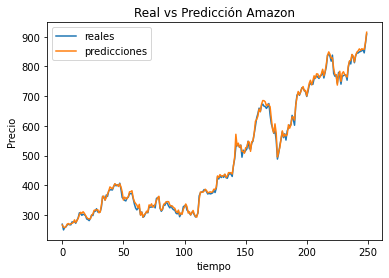

In [10]:
plt.figure()
plt.plot(t_test, label = 'reales')
plt.plot(y_pred, label = 'predicciones')
plt.title('Real vs Predicción Amazon')
plt.xlabel('tiempo')
plt.ylabel('Precio')
plt.legend()

In [11]:
score = model_ej4.evaluate(x_test, t_test)
score

8/8 [==============================] - 0s 3ms/step - loss: 61.4623


61.4622802734375

5.- Diseña un modelo en Keras que utilice capas densas, LSTM, GRU, y convolucionales para predecir los valores de cierre Amazon utilizando como entrada los valores de apertura de los datos Amazon, Microsoft, Meta (facebook), Apple y Google de los 4 días anteriores. Compáralo con un modelo con una capa lineal.

In [2]:
amz = pd.read_csv("amzn.us.txt", delimiter = ",", index_col = 'Date')
msft = pd.read_csv("msft.us.txt", delimiter = ",", index_col = 'Date')
fb = pd.read_csv("fb.us.txt", delimiter = ",", index_col = 'Date')
aapl = pd.read_csv("aapl.us.txt", delimiter = ",", index_col = 'Date')
googl = pd.read_csv("googl.us.txt", delimiter = ",", index_col = 'Date')

In [3]:
amzn_open = amz['Open']
msft_open = msft['Open']
fb_open = fb['Open']
aapl_open = aapl['Open']
googl_open = googl['Open']

amzn_close = amz['Close']

In [4]:
df = pd.DataFrame(data = [amzn_open, msft_open, fb_open, aapl_open, googl_open, amzn_close])
df = df.T
df.columns = ['amzn', 'msft', 'fb', 'aapl', 'googl', 'amzn_close']
df = df.dropna ()
df.tail()

,amzn,msft,fb,aapl,googl,amzn_close
Date,,,,,,
2017-11-06,1109.15,84.20,178.56,171.75,1049.10,1120.66
2017-11-07,1124.74,84.77,180.50,173.29,1049.65,1123.17
2017-11-08,1122.82,84.14,179.79,174.03,1050.05,1132.88
2017-11-09,1125.96,84.11,178.31,174.48,1048.00,1129.13
2017-11-10,1126.10,83.79,178.35,175.11,1043.87,1125.35


In [5]:
xx = df.values[0:1000, 0:5]
tt = df.values[0:1000, 5]
x_train = np.reshape (xx, (250, 4, 5))# , 1
t_train = tt [3:1000:4]

xx = df.values[1000:1380, 0:5]
tt = df.values[1000:1380, 5]
x_test = np.reshape (xx,(95, 4, 5))
t_test = tt [3:380:4]

In [6]:
#Modelo
model_ej5 = Sequential()

model_ej5.add(Conv1D(64, 
                   kernel_size = 3, 
                   activation = 'relu', 
                   input_shape = x_train.shape [1:], 
                   padding = 'same'))

model_ej5.add(Conv1D(32, kernel_size = 3, 
                   activation = 'relu', 
                   padding = 'same'))

model_ej5.add(LSTM(10, 
                 return_sequences = True, 
                 activation = 'relu'))

model_ej5.add(GRU(10,
                return_sequences = False, 
                activation = 'relu'))

model_ej5.add(Flatten())

model_ej5.add(Dense(1))

model_ej5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             1024      
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 32)             6176      
                                                                 
 lstm (LSTM)                 (None, 4, 10)             1720      
                                                                 
 gru (GRU)                   (None, 10)                660       
                                                                 
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 9,591
Trainable params: 9,591
Non-trainabl

In [7]:
# Compilo

model_ej5.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = 'mse')

In [8]:
hist_ej5 = model_ej5.fit(x_train, t_train, epochs = 350, validation_split = 0.3)

Epoch 1/350
6/6 [==============================] - 6s 183ms/step - loss: 74550.3203 - val_loss: 188552.7812
Epoch 2/350
6/6 [==============================] - 0s 30ms/step - loss: 52371.4688 - val_loss: 162360.0000
Epoch 3/350
6/6 [==============================] - 0s 34ms/step - loss: 39717.0820 - val_loss: 98969.0547
Epoch 4/350
6/6 [==============================] - 0s 21ms/step - loss: 22835.4941 - val_loss: 32804.0820
Epoch 5/350
6/6 [==============================] - 0s 22ms/step - loss: 3082.9707 - val_loss: 10801.7197
Epoch 6/350
6/6 [==============================] - 0s 18ms/step - loss: 832.7086 - val_loss: 2960.4709
Epoch 7/350
6/6 [==============================] - 0s 18ms/step - loss: 551.3546 - val_loss: 1200.3854
Epoch 8/350
6/6 [==============================] - 0s 16ms/step - loss: 921.8036 - val_loss: 1364.2461
Epoch 9/350
6/6 [==============================] - 0s 22ms/step - loss: 625.9815 - val_loss: 2945.2366
Epoch 10/350
6/6 [==============================] - 0s 3

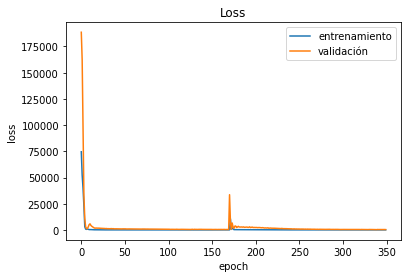

In [9]:
plt.plot(hist_ej5.history['loss'], label = "entrenamiento")
plt.plot(hist_ej5.history['val_loss'], label = "validación")
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [10]:
y_pred = model_ej5.predict(x_test)

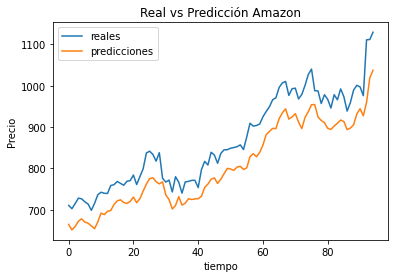

In [11]:
plt.figure()
plt.plot(t_test, label = 'reales')
plt.plot(y_pred, label = 'predicciones')
plt.title('Real vs Predicción Amazon')
plt.xlabel('tiempo')
plt.ylabel('Precio')
plt.legend()

In [12]:
# Evaluamos

score = model_ej5.evaluate(x_test, t_test)
score

3/3 [==============================] - 0s 9ms/step - loss: 3717.2461


3717.24609375

6.- Compara el modelo anterior con un modelo que use convoluciones 2D. Ten en cuenta que has de reordenar los datos para poder usar convoluciones 2D. Compara el resultado en unos datos de test con el resultado del modelo anterior. ¿Obtienes mejoras al utilizar las convoluciones 2D?

In [2]:
amz = pd.read_csv("amzn.us.txt", delimiter = ",", index_col = 'Date')
msft = pd.read_csv("msft.us.txt", delimiter = ",", index_col = 'Date')
fb = pd.read_csv("fb.us.txt", delimiter = ",", index_col = 'Date')
aapl = pd.read_csv("aapl.us.txt", delimiter = ",", index_col = 'Date')
googl = pd.read_csv("googl.us.txt", delimiter = ",", index_col = 'Date')

In [3]:
amzn_open = amz['Open']
msft_open = msft['Open']
fb_open = fb['Open']
aapl_open = aapl['Open']
googl_open = googl['Open']

amzn_close = amz['Close']

In [4]:
df = pd.DataFrame(data = [amzn_open, msft_open, fb_open, aapl_open, googl_open, amzn_close])
df = df.T
df.columns = ['amzn', 'msft', 'fb', 'aapl', 'googl', 'amzn_close']
df = df.dropna()
df

,amzn,msft,fb,aapl,googl,amzn_close
Date,,,,,,
2012-05-18,219.41,25.831,42.05,68.381,312.55,213.85
2012-05-21,214.03,25.233,36.53,68.449,300.26,218.11
2012-05-22,218.31,25.745,32.61,72.939,306.72,215.33
2012-05-23,214.71,25.449,31.37,71.396,300.82,217.28
2012-05-24,217.00,25.285,32.95,73.748,304.58,215.24
...,...,...,...,...,...,...
2017-11-06,1109.15,84.200,178.56,171.750,1049.10,1120.66
2017-11-07,1124.74,84.770,180.50,173.290,1049.65,1123.17
2017-11-08,1122.82,84.140,179.79,174.030,1050.05,1132.88


In [5]:
xx = df.values[0:1000, 0:5]
tt = df.values[0:1000, 5]
x_train = np.reshape (xx, (250, 4, 5, 1))
t_train = tt[3:1000:4]

xx = df.values[1000:1380, 0:5]
tt = df.values[1000:1380, 5]
x_test = np.reshape (xx, (95, 4, 5, 1))
t_test = tt[3:380:4]

In [6]:
#Modelo
model_ej6 = Sequential()

model_ej6.add(Conv2D(64, 
                   kernel_size = 3, 
                   activation = 'relu', 
                   input_shape = x_train.shape [1:], 
                   padding = 'same'))

model_ej6.add(Conv2D(32, kernel_size = 3, 
                   activation = 'relu', 
                   padding = 'same'))

model_ej6.add(TimeDistributed(Flatten()))
model_ej6.add(TimeDistributed(Flatten()))

model_ej6.add(LSTM(10, 
                 return_sequences = True, 
                 activation = 'relu'))

model_ej6.add(GRU(10,
                return_sequences = False, 
                activation = 'relu'))

model_ej6.add(Flatten())

model_ej6.add(Dense(1))

model_ej6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 4, 5, 64)          640       
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 5, 32)          18464     
                                                                 
 time_distributed (TimeDistr  (None, 4, 160)           0         
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 4, 160)           0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 4, 10)             6840      
                                                                 
 gru (GRU)                   (None, 10)                6

In [7]:
# Compilo

model_ej6.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss = 'mse')

In [8]:
hist_ej6 = model_ej6.fit (x_train, t_train, epochs = 350, validation_split = 0.3)

Epoch 1/350
6/6 [==============================] - 7s 177ms/step - loss: 92103.7500 - val_loss: 273144.2812
Epoch 2/350
6/6 [==============================] - 0s 55ms/step - loss: 72807.9688 - val_loss: 193078.5312
Epoch 3/350
6/6 [==============================] - 0s 31ms/step - loss: 50962.8242 - val_loss: 145555.8438
Epoch 4/350
6/6 [==============================] - 0s 38ms/step - loss: 32969.8164 - val_loss: 83592.2031
Epoch 5/350
6/6 [==============================] - 0s 42ms/step - loss: 13541.9326 - val_loss: 30261.9141
Epoch 6/350
6/6 [==============================] - 0s 28ms/step - loss: 2138.3062 - val_loss: 2716.1594
Epoch 7/350
6/6 [==============================] - 0s 47ms/step - loss: 1827.3098 - val_loss: 868.2620
Epoch 8/350
6/6 [==============================] - 0s 33ms/step - loss: 1915.5768 - val_loss: 3564.5361
Epoch 9/350
6/6 [==============================] - 0s 41ms/step - loss: 580.3153 - val_loss: 10514.6562
Epoch 10/350
6/6 [==============================] -

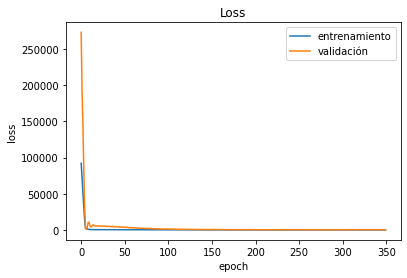

In [9]:
plt.plot(hist_ej6.history['loss'], label = "entrenamiento")
plt.plot(hist_ej6.history['val_loss'], label = "validación")
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [10]:
y_pred = model_ej6.predict(x_test)

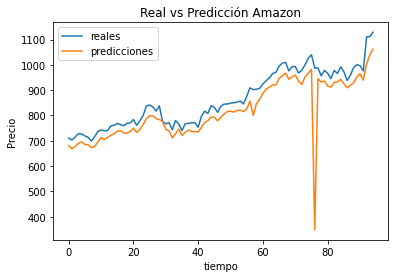

In [11]:
plt.figure()
plt.plot (t_test, label = 'reales')
plt.plot (y_pred, label = 'predicciones')
plt.title('Real vs Predicción Amazon')
plt.xlabel('tiempo')
plt.ylabel('Precio')
plt.legend()

In [12]:
# Evaluamos

score = model_ej6.evaluate(x_test, t_test)
score

3/3 [==============================] - 0s 6ms/step - loss: 6074.5088


6074.5087890625